:G191210012 /
Ali Yusuf Akbay /
Bilgisayar Mühendisliği 1. öğretim A grubu

                                              DOĞRU FİYAT BELİRLEMEK
Günümüzde alışverişin internet ortamına gerçekleşmesi sebebiyle fiyat belirleme konusunda artık daha doğru karar vermemizi sağlayan büyük veri kaynakları oluşmaktadır. Eskiden evini satmak isteyen bir bireyin doğru fiyat belirleme konusunda güvenebileceğini tek kaynak yakın zamanda çevre mahallesindeki ev satışları olmak zorundaydı şimdi ise fiyatlandırma konusunda çok daha başarılı makine öğrenmesi sistemleri kullanılabilir insanın düşünebileceğinden çok daha fazla faktörün fiyat belirleme konusundaki etkisi ölçülebilir. Bu hem bir ürünü satın alacak kişi için hemde satan kişi için bir güven ve kolaylık oluşturacaktır. Ticaretin daha hızlı ve tutarlı bir şekilde akmasını sağlıyacak yatırım yapmayı daha kolay ve basit bir hale getirecektir.

## VERİYİ ANLAMAK

In [ ]:
#Veriyi temizlemek,düzenlemek ve incelemek için gerekli kütüphaneleri yüklüyor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#colab çok fazla veri olunca 3 nokta koyarak hepsini göstermiyordu bu kod ile bütün verileri görmem mümkün oldu
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
#verinin yüklenmesi ve veriye bir önbakış
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#verideki satır ve sütün sayıları yani kaç adet veri var ve bu verilerin kaçar tane özellkileri var
print(train_data.shape)
print(test_data.shape)
#train datasette 81 sütün varken test datasette 80 tane bulunmakta çünkü test datasında House_Price sütünü bulunamamkta
#bu bir yarışma olduğu için test datasetindeki tahminlerimle yarışmaya katılacam o yüzden House_Price değişkeni test içerisinde yok

(1460, 81)
(1459, 80)


In [ ]:
#verideki öznitelikler hakkında bilgiler
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#verideki sayısal özniteliklerin bazı statistik bilgileri
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
#verideki sayısal özniteliklerin bazı statistik bilgileri
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# VERİNİN HAZIRLANMASI


In [ ]:
#Train data setinde hangi özniteliğin kaç adet Null değeri bulunmakta?
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

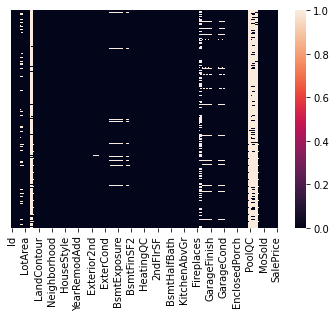

In [ ]:
#boş değerler için bir heatmap verilerin içindeki Null değerlerin dağılımını gösteriyor
sns.heatmap(train_data.isnull(), yticklabels=False)

In [ ]:
#PoolQC, Fence, MiscFeature öznitelikleri çok fazla boş değere sahip oldukları için tablodan sildim
train_data.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_data.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
#Her yaptığım değişiklikleri test ve train datasetinde aynı anda ekliyorum

In [ ]:
train_data.drop(['GarageYrBlt'],axis=1,inplace=True)
test_data.drop(['GarageYrBlt'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
#test data setinde hangi özniteliğin kaç adet Null değeri bulunmakta?
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

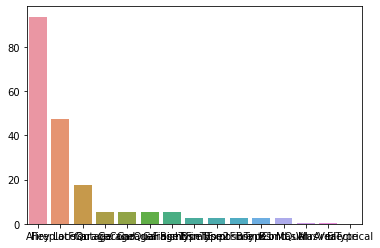

In [ ]:
#Null değerlerin sütünlardaki oranlarını tespit edip test_data_na içerisine attım ve bunları bir barplot ile görselleştirdim
test_data_na = (train_data.isnull().sum() / len(train_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
sns.barplot(x=test_data_na.index, y=test_data_na)

In [ ]:
#test datasetinde Alley değerinde çok fazla null değer olduğu için tablodan sildim
train_data.drop(['Alley'],axis=1,inplace=True)
test_data.drop(['Alley'],axis=1,inplace=True)

In [ ]:
#Id değeri bizim herhangi bir işimize yaramayan unique value bir değer olduğu için tablolardan sildim
train_data.drop(['Id'],axis=1,inplace=True)
test_data.drop(['Id'],axis=1,inplace=True)


# aykırı değerler


In [ ]:
#sütünların standart sapmalarını bulup çoktan aza doğru sıraladım
train_data.std().sort_values(ascending=False)

SalePrice        79442.502883
LotArea           9981.264932
GrLivArea          525.480383
MiscVal            496.123024
BsmtFinSF1         456.098091
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
2ndFlrSF           436.528436
1stFlrSF           386.587738
GarageArea         213.804841
MasVnrArea         181.066207
BsmtFinSF2         161.319273
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
ScreenPorch         55.757415
LowQualFinSF        48.623081
MSSubClass          42.300571
PoolArea            40.177307
YearBuilt           30.202904
3SsnPorch           29.317331
LotFrontage         24.284752
YearRemodAdd        20.645407
MoSold               2.703626
TotRmsAbvGrd         1.625393
OverallQual          1.382997
YrSold               1.328095
OverallCond          1.112799
BedroomAbvGr         0.815778
GarageCars           0.747315
Fireplaces           0.644666
FullBath             0.550916
BsmtFullBath         0.518911
HalfBath  

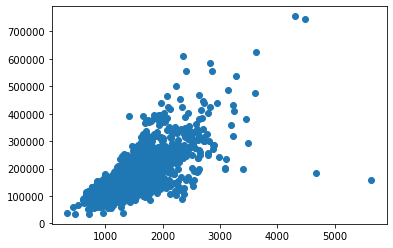

In [ ]:
#Bir scatter plot ile aykırı değerlerin tespitini yaptım
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])

In [ ]:
#aykırı değerler silindi
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



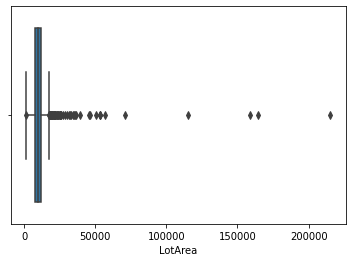

In [ ]:
#Diğer aykırı değerleri bulmak için boxplot kullandım
#Lotarea'nın aykırı değerleri silinmeden önceki boxplot grafiği
sns.boxplot(train_data['LotArea'])

In [ ]:
#100000 değerinin üzerindeki değerleri aykırı değer olarak saydım ve onları sildim
train_data = train_data.drop(train_data[(train_data['LotArea']>100000)].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



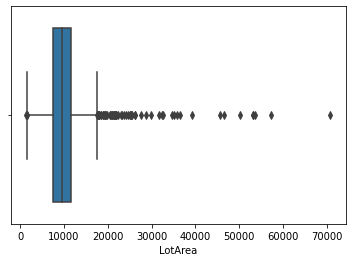

In [ ]:
#Lotarea'nın aykırı değerleri silindikten sonraki boxplot grafiği
sns.boxplot(train_data['LotArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



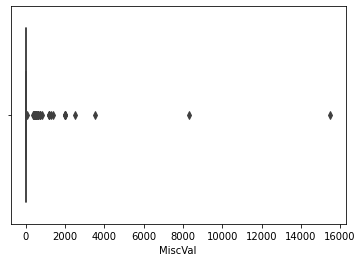

In [ ]:
#MiscVal'ın aykırı değerleri silinmeden önceki boxplot grafiği
sns.boxplot(train_data['MiscVal'])

In [ ]:
#8000 değerinin üzerindeki değerleri aykırı değer olarak saydım ve onları sildim
train_data = train_data.drop(train_data[(train_data['MiscVal']>8000)].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



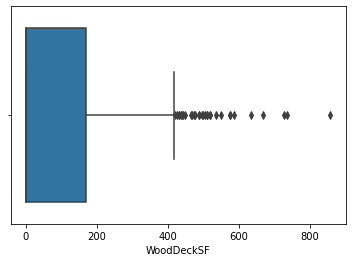

In [ ]:
#MiscVal'ın aykırı değerleri silindikten sonraki boxplot grafiği
sns.boxplot(train_data['MiscVal'])

In [ ]:
#bütün silme işlemleri bittikten sonraki kalan satır sayısına baktım
train_data.shape

(1452, 75)

# Sütün silme işleri tamamlandı sırada boş değerler halledilecek


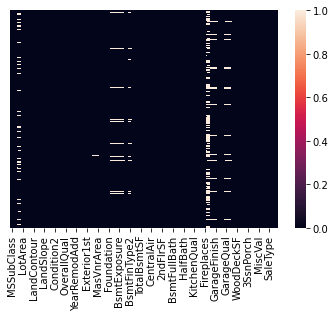

In [ ]:
sns.heatmap(train_data.isnull(), yticklabels=False)

In [ ]:
#Boş olan sayısal değereleri ortalama değer ile kategorik değerleri ise en çok tekrarlayan kategori ile değiştirdim
train_data['LotFrontage']=test_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
train_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
train_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
train_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
train_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
train_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
train_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
train_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
train_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])

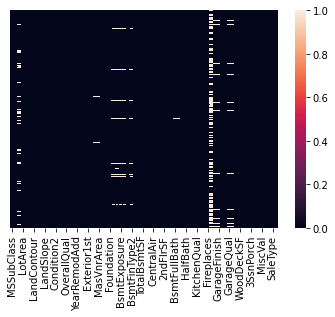

In [ ]:
sns.heatmap(test_data.isnull(), yticklabels=False)

In [ ]:
#Boş olan sayısal değereleri ortalama değer ile kategorik değerleri ise en çok tekrarlayan kategori ile değiştirdim
#Aynı işlemleri test dataseti içinde gerçeklestirdim
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MSZoning']=test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])

In [ ]:
#bütün işlemlerden sonra kalan Null değerli satırları sildim
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train_data.shape

(1413, 75)

# Sayısal değerleri ölçeklendirme (SCALLING)

In [ ]:
#Sayısal değerleri bir liste içerinde depoladım ve içerisinden SalePrice'ı çıkardım
numeric = train_data.select_dtypes(include=np.number).columns.tolist()
numeric.remove('SalePrice')
numeric

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
#ölçeklendirmeden önceki min, max ve mean değerleri
train_data[numeric].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,56.762208,68.918906,10050.429582,6.142958,5.589526,1971.603680,1985.288040,99.178344,448.395612,47.058740,583.043878,1078.498231,1158.848549,350.037509,6.001415,1514.887473,0.433121,0.058740,1.561217,0.391366,2.866242,1.036093,6.510970,0.617127,1.775655,474.990800,95.007785,47.160651,22.042463,3.395612,15.561925,2.510970,23.562633,6.328379,2007.811040
std,42.180830,20.630786,5462.016208,1.354648,1.110064,30.440348,20.460488,176.880357,432.037035,162.271221,438.704330,382.422485,371.352573,436.649496,49.398249,507.929761,0.516670,0.241168,0.550531,0.503933,0.810571,0.197648,1.601849,0.639729,0.745089,211.869078,124.062641,65.847453,61.269325,29.421955,56.608928,38.811532,162.470790,2.715973,1.329697
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7560.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,810.000000,882.000000,0.000000,0.000000,1137.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.730384,9480.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,397.000000,0.000000,495.000000,1003.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11600.000000,7.000000,6.000000,2001.000000,2004.000000,162.000000,719.000000,0.000000,816.000000,1304.000000,1391.000000,732.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,2500.000000,12.000000,2010.000000


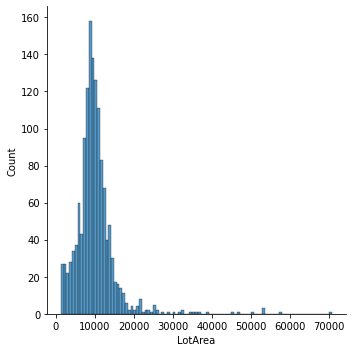

In [ ]:
#ölçeklendirmeden önceki LotArea değerlinin tablosu
sns.displot(train_data['LotArea'])

In [ ]:
#Scaller olarak MinMaxScaller Kullandım
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

scaler.fit(train_data[numeric])

train_data[numeric] = scaler.transform(train_data[numeric])
test_data[numeric] = scaler.transform(test_data[numeric])
##ölçeklendirmeden sonraki min, max ve mean değerleri
train_data[numeric].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,0.216248,0.267703,0.125976,0.571440,0.573691,0.721766,0.588134,0.076882,0.204934,0.031926,0.249591,0.313930,0.258369,0.169510,0.010492,0.266688,0.144374,0.029370,0.520406,0.195683,0.358280,0.345364,0.319179,0.205709,0.443914,0.341720,0.110861,0.086217,0.039932,0.006684,0.032421,0.003402,0.009425,0.484398,0.452760
std,0.248123,0.115256,0.078634,0.150516,0.138758,0.220582,0.341008,0.137117,0.197458,0.110089,0.187802,0.123322,0.133101,0.211453,0.086361,0.125787,0.172223,0.120584,0.183510,0.251966,0.101321,0.065883,0.145623,0.213243,0.186272,0.152424,0.144764,0.120379,0.110995,0.057917,0.117935,0.052590,0.064988,0.246907,0.332424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.217877,0.090123,0.444444,0.500000,0.594203,0.300000,0.000000,0.000000,0.000000,0.106164,0.227346,0.159140,0.000000,0.000000,0.173105,0.000000,0.000000,0.333333,0.000000,0.250000,0.333333,0.181818,0.000000,0.250000,0.241727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.176471,0.272237,0.117764,0.555556,0.500000,0.739130,0.733333,0.000000,0.181444,0.000000,0.211901,0.289584,0.232258,0.000000,0.000000,0.254581,0.000000,0.000000,0.666667,0.000000,0.375000,0.333333,0.272727,0.333333,0.500000,0.345324,0.000000,0.047532,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.294118,0.318436,0.148285,0.666667,0.625000,0.934783,0.900000,0.125581,0.328611,0.000000,0.349315,0.386649,0.341577,0.354479,0.000000,0.331352,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.363636,0.333333,0.500000,0.414388,0.196033,0.126143,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


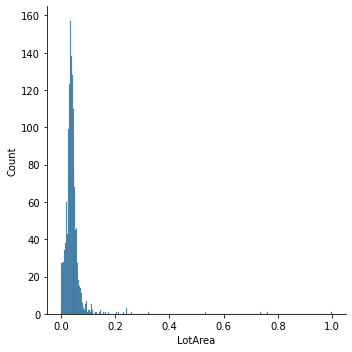

In [ ]:
#ölçeklendirmeden sonraki LotArea değerlinin tablosu
sns.displot(train_data['LotArea'])

# Kategorik değerleri sayısala çevirme

In [ ]:
#bütün kategorik değerleri columns değişkeninde topladım
categoric=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(categoric)

39

One-Hot coding tekniği, her bir kategori sütünündaki farklı kategoriler için bir sütün açıp onları var/yok yani 1/0 olarak değerlerniriyor örneğin:
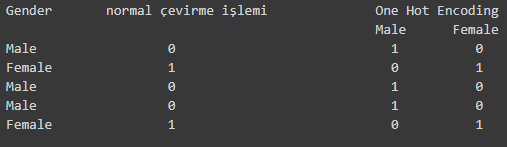

In [ ]:
#kategorik değerleri One-Hot Encoding tekniği ile makine tarafından okunabilen sayısal değerlere çeviren fonksiyon
def category_onehot_multcols(multcolumns):
    df_final=All_data
    i=0
    for fields in multcolumns:
        
        df1=pd.get_dummies(All_data[fields],drop_first=True)
        
        All_data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([All_data,df_final],axis=1)
        
    return df_final

In [ ]:
#test ve train data setinde farklı kategorik değerler olduğu için 2 data seti birleştirip sonra One-Hot Encoding kodunu uyguladım
All_data = pd.concat([train_data,test_data],axis=0)

In [ ]:
#All_data set içerisinde daha önceden columns değişkenine kaydettiğim sütünları tek tek One-Hot Encoding'e göre ayarlıyorum
All_data=category_onehot_multcols(categoric)

In [ ]:
All_data.shape

(2872, 232)

In [ ]:
All_data.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAn,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,Fa,Gd,Po,TA,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Gd,Po,TA,Gd,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,BLQ,GLQ,LwQ,Rec,Unf,Gable,Gambrel,Hip,Mansard,Shed,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,GasW,Grav,OthW,Wall,Fa,Gd,Po,TA,Y,FuseF,FuseP,Mix,SBrkr,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,0.235294,0.329609,0.102935,0.666667,0.500,0.949275,0.883333,0.000000,0.322669,0.0,0.064212,0.242180,0.149821,0.413559,0.0,0.315007,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.454545,0.000000,0.50,0.394245,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
1,0.000000,0.335196,0.119492,0.555556,0.875,0.753623,0.433333,0.083721,0.446984,0.0,0.121575,0.373105,0.295341,0.000000,0.0,0.204061,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.272727,0.333333,0.50,0.330935,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
2,0.235294,0.296089,0.143246,0.666667,0.500,0.934783,0.866667,0.000000,0.222121,0.0,0.185788,0.262818,0.172760,0.419370,0.0,0.333829,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.272727,0.333333,0.50,0.437410,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,223500.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0.294118,0.318436,0.118772,0.666667,0.500,0.311594,0.333333,0.015504,0.098720,0.0,0.231164,0.209932,0.187455,0.366102,0.0,0.316741,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.363636,0.333333,0.75,0.461871,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,140000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
#One-Hot Encoding sonrası birbirinin aynısı kopya sütünları sildim
All_data =All_data.loc[:,~All_data.columns.duplicated()]
All_data.shape

(2872, 174)

In [ ]:
#Train ve test data setini tekrardan böldüm
train_data=All_data.iloc[:1413,:]
test_data=All_data.iloc[1413:,:]

In [ ]:
#Data'yı tekrardan 2'ye ayırırken verileri birbirine karıştırmış mıyım diye konrtol ettim (test datasetinde salePrice değişkeni Null, trainde ise Null olmaması gerekir)
train_data['SalePrice'].tail()

1454    185000.0
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
Name: SalePrice, dtype: float64

In [ ]:
test_data['SalePrice'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SalePrice, dtype: float64

In [ ]:
#SalesPrice sütünü 2 data seti birleştirdiğimizden dolayı test data içerisinde eklenmiş onu çıkarttım
test_data.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# MODEL OLUŞTURMA



In [ ]:
#Train data'yı X ve Y değerlerine böldüm
x=train_data.drop(['SalePrice'],axis=1)
y=train_data['SalePrice']

In [ ]:
#Model oluşturmak ve data seti bölmek için gerekli kütüphaneleri yükledim
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
#model denemek için datayı gerekli parçalara böldüm
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#ilk denediğim model basit bir linear reggresion modeli oldu
Lin_model=LinearRegression()
Lin_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#modelin doğruluğunu test ettim

y_predict = Lin_model.predict(x_test)
mean_squared_error(y_test,y_predict,squared=False)

16975460130441.166

In [ ]:
#2. denediğim model Random Forest oldu
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
RandomForestPredictions = forest_model.predict(x_test)
mean_absolute_error(y_test, RandomForestPredictions)

15145.127703180211

In [ ]:
#3. denediğim model XGBRegressor oldu
from xgboost import XGBRegressor

XG_model = XGBRegressor(max_depth=4)
XG_model.fit(x_train, y_train)

[10:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4)

In [ ]:
XGpredictions = XG_model.predict(x_test)
mean_absolute_error(XGpredictions, y_test)

13649.55667513251

In [ ]:
#En başarılı modele göre test_data içerisindeki verileri için tahminde bulunup  yarışmaya katıldım
final_result = my_model.predict(test_data)
final_result = pd.DataFrame(final_result)
submission = pd.read_csv('sample_submission.csv')
final_result = pd.concat([submission['Id'],final_result],axis=1)
final_result.columns = ['Id','SalePrice']
final_result.to_csv('sample_submission.csv',index=False)